In [3]:
from PIL import Image
import numpy as np
import cv2


image = '/home/ttq/cmh/CVUSA_ori/train/satellite/0030875/0030875.jpg'


PIL_img = Image.open(image)
np_img = np.array(PIL_img)

cv_image = cv2.imread(image)
cv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)

print(type(np_img))
print(type(cv_image))

print(np_img.shape)
print(cv_image.shape)

(cv_image==np_img)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(750, 750, 3)
(750, 750, 3)


array([[[ True,  True, False],
        [ True,  True, False],
        [ True,  True,  True],
        ...,
        [False,  True,  True],
        [ True, False, False],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True, False],
        ...,
        [False,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True, False],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]],

       [[ True,  True,  True],
        [ True,  True, False],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

[54 67 86 44 95 75 68 59 68 73 91 85 71 45 79 93 71 43 66 87 89 97 60 84
 72 77 99 29 10  6 18 13  9 24 11  6  5 13 20 11 11 13  5 24 14 18 23 25
 10 21 28 15 28 16 26 11 21 16 20  9 18  9 28 27  5 29 16  6 22  6 29 21
 21 10  9 15 29 10 13 16 27]
(9, 9)
(27,)


<AxesSubplot:>

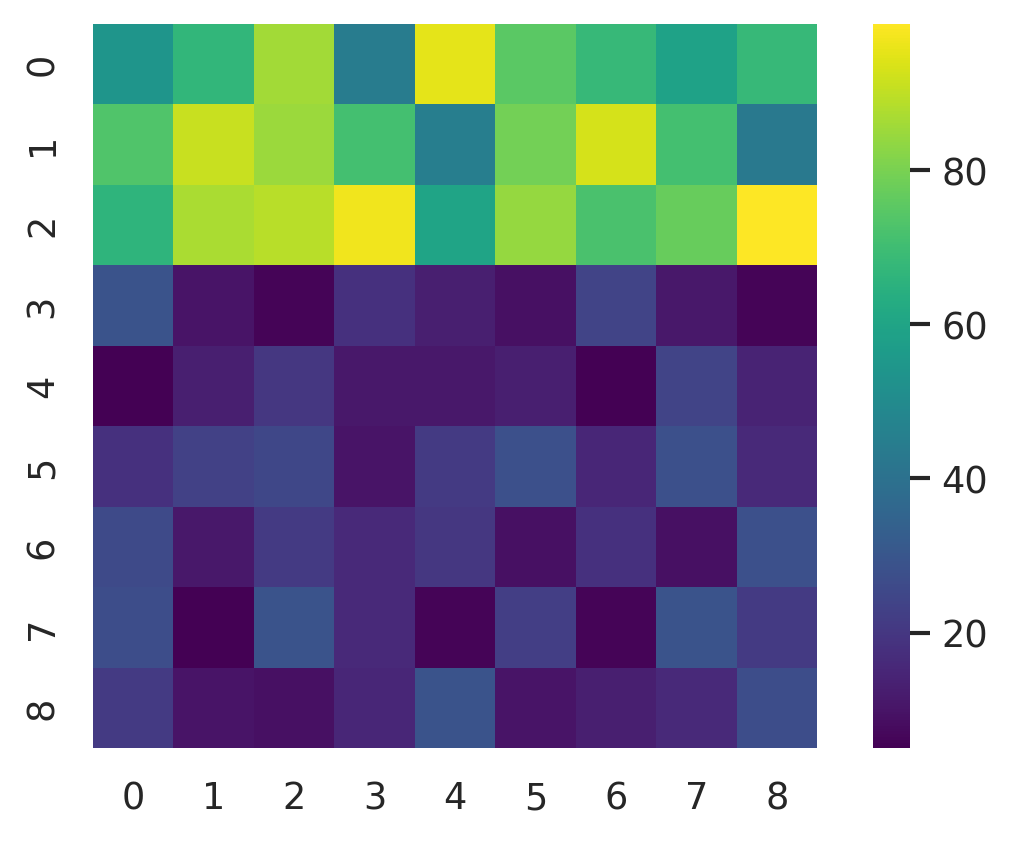

In [54]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

# y = np.random.randint(1,100,81)
# y = y.reshape((9,9))

y = np.random.randint(40,100,27)
x1 = np.random.randint(5,30,27)
x2 = np.random.randint(5,30,27)
z = np.concatenate((y,x1,x2))
print(z)
z = z.reshape((9,9))
print(z.shape)


print(y.shape)
plt.figure(dpi=240)
# sns.cubehelix_palette(as_cmap=True)
# "viridis"
sns.heatmap(z, cmap="viridis", square=True)




In [53]:
import torch
from torch import nn
from swin import SwinConfig, SwinModel
from torchvision.models.resnet import resnet50
import copy
resnet = resnet50(weights=None)

#print(resnet)

In [54]:
for name, module in resnet.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [68]:

configuration = SwinConfig(image_size=(128, 512), output_hidden_states=True)
model1 = SwinModel.from_pretrained(pretrained_model_name_or_path='microsoft/swin-tiny-patch4-window7-224',
                                            config=configuration,
                                            ignore_mismatched_sizes=True,
                                            )

# print(id(model1.encoder.layers[3].blocks[0]))

new_swin = nn.Sequential(copy.deepcopy(model1.encoder.layers[3].blocks[0]))
print(type(new_swin))


input1 = torch.rand((8, 3, 128, 512), dtype=torch.float)
input2 = torch.rand((8, 768, 8, 32), dtype=torch.float)
# output1, bfore_downsample1 = model1(input1)

# print(output1[3][3].size())

output2 = new_swin.forward(input2, input_dimensions=(8,32))
print(output2.size())




Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SwinModel were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- swin.encoder.layers.3.blocks.0.attention.self.relative_position_bias_table: found shape torch.Size([169, 24]) in the checkpoint and torch.Size([49, 24]) in the model instantiated
- swin.encoder.layers.3.bloc

<class 'torch.nn.modules.container.Sequential'>


TypeError: forward() got an unexpected keyword argument 'input_dimensions'

In [50]:
import torch


# a引用指向某块内存空间
a = torch.nn.Linear(in_features=5, out_features=1, bias=True)
# 浅拷贝相当于拷贝一个引用，所以他们指向的内存空间是一样的


print(a.weight)


Parameter containing:
tensor([[ 0.2017,  0.3664, -0.3147,  0.3845,  0.0075]], requires_grad=True)


In [51]:
b = copy.deepcopy(a)
print(b.weight)

with torch.no_grad():
    b.weight.fill_(0.)

print(b.weight)
print(a.weight)

Parameter containing:
tensor([[ 0.2017,  0.3664, -0.3147,  0.3845,  0.0075]], requires_grad=True)
Parameter containing:
tensor([[0., 0., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([[ 0.2017,  0.3664, -0.3147,  0.3845,  0.0075]], requires_grad=True)
